<a href="https://colab.research.google.com/github/Followb1ind1y/Machine_Learning_Algorithms/blob/main/ML_Algorithms_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Algorithms: Support Vector Machine**

### **Support Vector Machine Basics**

**Support Vector Machine(SVM)** is a **supervised** machine learning algorithm which can be used for both **classification** or **regression** challenges. **Support Vectors** are data points that are **nearest to the hyperplane**. It influences the position and orientation of the hyperplane. Removing the support vectors will alter the position of the hyperplane. 

The **goal** is to learn a hyperplane that discriminates between classes; we find a decision boundary which maximum separation between two classes. **Margin** is the distance between the hyperplane and the closest points.

* **Hard Margin:** Classes are **linear separable**. We find a hyperplane with margin that maximally separates the two classes.

* **Soft Margin:** Classes are **not linear separable**. We allow error (slack) in the model fitting and find a decision boundary with the minimum slack required to discriminate between two classes.

* **Kernel Methods:** Classes are **not linear separable**. Converts a low-dimensional input space into a higher-dimensional space. Mapping the data into a new feature space. The data will be linearly separable in the. new space.

### **Hard Margin SVM**

If the data is **linear separable**, there exist an infinite number of hyperplanes that can separate the two classes. The algorithm looks for the **best hyperplane**; the one with **largest margin**.

* Hyperplane separating the two classes: $\beta^{T}x+\beta_{0}=0$
* Set the labels: $y_{i}\in\{-1,1\}$
* We can classify points as $\mathrm{sign}\{d_{i}\}$ where $d_{i} = \beta^{T}x_{i}+\beta_{0}$


**Goal:** Maximize the Magin:
$$
\mathrm{Margin} = \min\{y_{i}d_{i}\}, \ \ \ \ i=1,2,3,...,n \\
$$

The Maximize Magin problem can be reduced to:

$$
\min_{\beta,\beta_{0}}\frac{1}{2}{\parallel\beta\parallel}^{2} \\
\mathrm{Subject \ to} \ y_{i}(\beta^{T}x_{i}+\beta_{0}) \geq 1, i =1,2,...,n
$$

From the **Lagrangian Method**, we can have:

$$
\begin{align*}
L_{p}&=\frac{1}{2}{\parallel\beta\parallel}^{2}-\sum_{i=1}^{n}\alpha_{i}[ y_{i}(\beta^{T}x_{i}+\beta_{0})-1] \\
&= \frac{1}{2}\beta^{T}\beta - \beta^{T}\sum_{i=1}^{n}\alpha_{i}y_{i}x_{i}-\beta_{0}\sum_{i=1}^{n}\alpha_{i}y_{i}+\sum_{i=1}^{n}\alpha_{i}
\end{align*}
$$

Our **primal optimization problem** with the Lagrangian becomes the following: 

$$
\min_{\beta,\beta_{0}}(\max_{\alpha_{i}}L(\beta,\beta_{0},\alpha))
$$

The optimization function and the constraints meet some technical conditions such that we can do the following:

$$
\min_{\beta,\beta_{0}}(\max_{\alpha_{i}}L(\beta,\beta_{0},\alpha))=\max_{\alpha_{i}}(\min_{\beta,\beta_{0}}L(\beta,\beta_{0},\alpha))
$$

This allows us to take the partial derivatives of $L(\beta,\beta_{0},\alpha)$ with respect to $\beta$ and $\beta_{0}$, equate to zero and then plug the results back into the original equation of the Lagrangian, hence generating an equivalent **dual** optimization problem of the form

$$
\begin{align*}
&\max_{\alpha_{i}}(\min_{\beta,\beta_{0}}L(\beta,\beta_{0},\alpha)) \\
&\max_{\alpha_{i}}\sum_{i=1}^{n}\alpha_{i} - \frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}\alpha_{i}\alpha_{j}y_{i}y_{j}<x_{i},x_{j}> \\
&\mathrm{s.t.} \ \alpha_{i} \geq 0 \\
&\mathrm{s.t.} \ \sum_{i=1}^{n}\alpha_{i}y_{i}=0
\end{align*}
$$

From the complementary slackness (**KKT Conditions**), we have 

$$\alpha_{i}^{\star}g(x^{\star})=\alpha_{i}^{\star}[y_{i}(\beta^{T}x_{i}+\beta_{0})-1] = 0$$

* if $\alpha_{i}^{\star} > 0$, then $y_{i}(\beta^{T}x_{i}+\beta_{0})-1 = 0$, i.e. $x_{i}$ is on the margin. This point is called **support vector**.
* if $y_{i}(\beta^{T}x_{i}+\beta_{0}) > 1$, $x_{i}$ is not on the margin, and $\alpha_{i}^{⋆}=0$

This is a convex optimization and can be solved by quadratic programming. 

### **Soft Margin SVM**

Having a dataset with linear separable classes is very unlikely in practice, so we remove this requirement. We now consider a dataset where both classes overlap such that no hyperplane exists that can completely seperate the two classes on the training data. Instead, the **goal** becomes to find a hyperplane which **minimizes the amount of datapoints that "spill" over to the opposite sides**.

We allow points to violate our previous constraint by some error $\zeta$, but penalize the objective function the more it is violated. Our new optimization problem becomes:

$$
\min_{\beta,\beta_{0}}\frac{1}{2}{\parallel\beta\parallel}^{2}+\gamma\sum_{i=1}^{n}\zeta_{i} \\
\mathrm{Subject \ to} \ y_{i}(\beta^{T}x_{i}+\beta_{0}) \geq 1-\zeta_{i}, \forall i \\
\zeta_{i} \geq 0, \forall i
$$

We formulate the **lagrangian function**:

$$
L(\beta_{0},\beta,\alpha,\zeta,\lambda)=\frac{1}{2}{\parallel\beta\parallel}^{2}+\gamma\sum_{i=1}^{n}\zeta_{i}-\sum_{i=1}^{n}\alpha_{i}[y_{i}(\beta^{T}x_{i}+\beta_{0})-(1-\zeta_{i})] - \sum_{i=1}^{n}\lambda_{i}\zeta_{i}
$$

$$
\begin{align*}
\max\sum_{i=1}^{n}\alpha_{i} - &\frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}\alpha_{i}\alpha_{j}y_{i}y_{j}<x_{i},{T}x_{j}> \\
&s.t. \ 0 \leq \alpha_{i} \leq \gamma \\
&s.t. \ 0 \sum_{i=1}^{n}\alpha_{i}y_{i}=0 \\
\end{align*}
$$

From the complementary slackness (**KKT Conditions**), we have 

$$
\alpha_{i}g(x^{⋆})=\alpha_{i}[y_{i}(\beta^{T}x_{i}+\beta_{0})-(1-\zeta_{i})] = 0, \\
\lambda_{i}\zeta_{i}=0
$$

* if $\alpha_{i}^{⋆} > 0$, then $y_{i}(\beta^{T}x_{i}+\beta_{0}) = 1-\zeta_{i}$, $x_{i}$ is a **support vector**.
    * $\lambda_{i}>0$, then $\zeta_{i}=0$. This point is on the margin. We know that $\gamma - \alpha_{i}^{⋆} - \lambda_{i} = 0 \Rightarrow \alpha_{i}^{⋆} < \gamma$ 
    * $\zeta_{i}>0$, then $\lambda_{i}=0$. This point is over the margin.
    
* if $\alpha_{i}^{\star}=0$, then this point is NOT **support vector**.
$$
y_{i}(\beta^{T}x_{i}+\beta_{0})-(1-\zeta_{i})> 0 \\
y_{i}(\beta^{T}x_{i}+\beta_{0})> 1-\zeta_{i} \\
Since \ \gamma - \alpha_{i}^{⋆} - \lambda_{i} = 0 \ and \ \alpha_{i}^{\star}=0 \\ 
\Rightarrow \lambda_{i}=\gamma \Rightarrow \zeta_{i}=0 \\
\Rightarrow y_{i}(\beta^{T}x_{i}+\beta_{0})> 1\\
$$

This is a convex optimization and can be solved by quadratic programming. 

### **Kernel Methods**

**Kernels** or **kernel methods** (also called **Kernel functions**) are sets of different types of algorithms that are being used for pattern analysis. They are used to solve a **non-linear problem** by using a linear classifier. Kernels are a convenient way of **expanding the feature space**. The fact that kernels expand the feature space will not be obvious. The predicted value for a new vector x can be written as:

$$
\hat{f}(x) = \hat{\beta_{0}}+ \sum_{i\in S}\hat{\alpha_{i}}y_{i}<x,x_{i}>
$$
Where

* $x_{i}$ is a vector, $y_{i}$ is scalar(+1 or -1), $\alpha_{i}$ is a scalar.
* alpha’s are the Lagrange multipliers arising during optimization
* S is the set of support vectors, and
* the inner product $<.,.>$ is defined as $<x_{i},x_{i}'> = \sum_{j=1}^{p}x_{ij}x_{ij}'$

Remarkably, the solution depends only on the inner product of the observations, not on the observations themselves.

* **Classical Example**:

$$
\begin{align*}
<\phi(x),\phi(x')> &= (x^{2}_{1},x^{2}_{2}\sqrt{2}x_{1}x_{2})(x'^{2}_{1},x'^{2}_{2}\sqrt{2}x'_{1}x'_{2})^{T} \\
&= ((x_{1},x_{2}),(x'_{1},x'_{2})^{T})^{2} \\
&= <x,x'> \\
&=: K(x,x') \\
\end{align*}
$$

* **Linear Kernel**

$$
K(x_{i},x_{i}') = \ <x_{i},x_{i}'> \ = \sum_{j=1}^{d}x_{ij}x_{i'j}
$$

* No additional tuning parameters
* Nonlinear kernels have more flexibility, but this is not always needed

* **Polynomial Kernel**

$$
K(x_{i},x_{i}') = (1+ <x_{i},x_{i}'>)^{p} = (\beta_{0}+ \gamma\sum_{j=1}^{d}x_{ij}x_{i'j})^{p}
$$

* A polynomial kernel of order $d=2$ corresponds to adding all possible quadratic variables
* $\beta_{0}, \gamma>0$ and $d$ (>0, integer) are tuning parameters
* In practice, often $\beta_{0}=0$, $d=2$ or $d=3$ are often sufficient. Set $d=2$ or $d=3$ and tune gamma and $C$

* **Radial Basis function (RBF) Kernel (or Gaussian Kernel)**

$$
K(x_{i},x_{i}') = \exp(-\gamma\parallel x_{i}-x_{i}'\parallel^{2}) = \exp(-\gamma\sum_{j=1}^{d}(x_{ij}x_{i'j})^{2})
$$

* $\gamma>0$ is a tuning parameter
* The kernel is very small for points far apart
* Most popular choice
* It can be shown this kernel corresponds to an infinite number of $x$‐variables

### **Dataset Initialization**

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [135]:
np.random.seed(0)

# Initial linear separable data
x_1, x_2 = np.random.rand(50, 1), np.random.rand(50, 1) + 1.1
y_1, y_2 = 3 + 3 * x_1 + np.random.rand(50, 1), 3 + 3 * x_1 + np.random.rand(50, 1) 
class_1, class_2 = np.concatenate((x_1, y_1), axis=1), np.concatenate((x_2, y_2), axis=1)
neg_ones, ones = -np.ones((50,1)), np.ones((50,1))
x_hard = np.concatenate((class_1, class_2), axis=0)
y_hard = np.concatenate((neg_ones, ones), axis=0)

# Initial non-linear separable data
x_3, x_4 = np.random.rand(50, 1), np.random.rand(50, 1) + 0.75
y_3, y_4 = 3 + 3 * x_3 + np.random.rand(50, 1), 3 + 3 * x_3 + np.random.rand(50, 1) 
class_3, class_4 = np.concatenate((x_3, y_3), axis=1), np.concatenate((x_4, y_4), axis=1)
neg_ones, ones = -np.ones((50,1)), np.ones((50,1))
x_soft = np.concatenate((class_3, class_4), axis=0)
y_soft = np.concatenate((neg_ones, ones), axis=0)

Text(0, 0.5, 'X2')

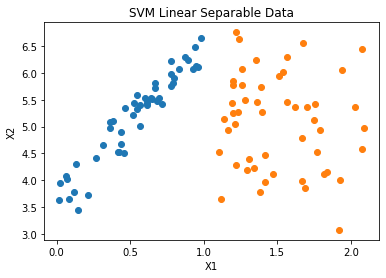

In [136]:
fig, ax = plt.subplots() 
ax.scatter(x_1,y_1) 
ax.scatter(x_2,y_2) 
ax.set_title('SVM Linear Separable Data')
ax.set_xlabel('X1') 
ax.set_ylabel('X2')

In [137]:
x_train_hard, x_test_hard, y_train_hard, y_test_hard = train_test_split(x_hard, y_hard)

Text(0, 0.5, 'X4')

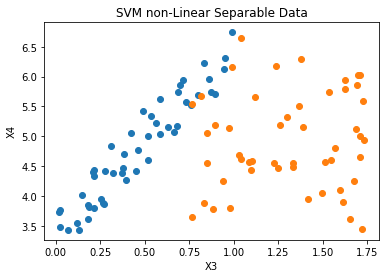

In [138]:
fig, ax = plt.subplots() 
ax.scatter(x_3,y_3) 
ax.scatter(x_4,y_4) 
ax.set_title('SVM non-Linear Separable Data')
ax.set_xlabel('X3') 
ax.set_ylabel('X4')

In [139]:
x_train_soft, x_test_soft, y_train_soft, y_test_soft = train_test_split(x_soft, y_soft)

### **Implementing Support Vector Machine using CVXOPT from scratch**

        cvxopt.solvers.qp(P, q[, G, h[, A, b[, solver[, initvals]]]])

Solves the pair of primal and dual convex quadratic programs

$$
\mathrm{Minimize \ }(\frac{1}{2})x^{T}Px+q^{T}x \\
\mathrm{Subject \ to \ } Gx \leq h, Ax = b\\
$$

and 

$$
\mathrm{Maximize \ }-(\frac{1}{2})(q+G^{T}z+A^{T}y)^{T}P(q+G^{T}z+A^{T}y)-h^{T}z-b^{T}y \\
\mathrm{Subject \ to \ } q+G^{T}z+A^{T}y \in \mathrm{Range}(P), z \geq 0\\
$$

Using CVXOPT library to solve the problem

* Create $P$ where $H_{i,j}=y^{(i)}y^{(j)}<x^{(i)}x^{(j)}>$
* Calculate $w=\sum^{m}_{i}y^{(i)}\alpha_{i}x^{(i)}$
* Determine the set of support vectors $S$ by finding the indices such that $\alpha_{i}>0$
* Calculate the intercept term using $b=y^{(s)}−\sum_{m∈S}\alpha_{m}y^{(m)}<x^{(m)}x^{(s)}>$
* For each new point $x′$ classify according to $y′=sign(w^{T}x′+b)$

* **Hard margin with Linear Separable Data**

In [140]:
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

In [141]:
class SupportVectorMachineHardMargin:
    def __init__(self, tol=1e-4):
        self.tol = tol
        
    def fit(self, x, y):
        m = x.shape[0]
        X_dash = y * x
        H = np.dot(X_dash , X_dash.T)

        #Converting into cvxopt format
        P = cvxopt_matrix(H)
        q = cvxopt_matrix(-np.ones((m, 1)))
        G = cvxopt_matrix(-np.eye(m))
        h = cvxopt_matrix(np.zeros(m))
        A = cvxopt_matrix(y.reshape(1, -1))
        b = cvxopt_matrix(np.zeros(1))

        #Run solver
        sol = cvxopt_solvers.qp(P, q, G, h, A, b)
        alphas = np.array(sol['x'])

        self.w = np.dot((y*alphas).T,x).reshape(-1,1)
        S = (alphas > self.tol).flatten()
        self.b = y[S] - np.dot(x[S], self.w)

        return self

    def predict(self, x):
        y_pred = np.dot(x, self.w) + self.b[0]
        y_pred[y_pred >= 0] = 1 
        y_pred[y_pred < 0] = -1
        return y_pred

In [142]:
# Model initialization
SVM_Hard_Margin = SupportVectorMachineHardMargin()
# Fit the data(train the model)
SVM_Hard_Margin.fit(x_train_hard,y_train_hard)
y_pred_hard = SVM_Hard_Margin.predict(x_test_hard)
test_accuracy = 1 - np.sum(np.abs((y_pred_hard - y_test_hard)/2)) / y_test_hard.shape[0]
print('Accuracy Score for Linear Kernel is', test_accuracy)
print('w = ',SVM_Hard_Margin.w)
print('b = ',SVM_Hard_Margin.b[0])

     pcost       dcost       gap    pres   dres
 0: -1.6709e+01 -3.7447e+01  3e+02  2e+01  2e+00
 1: -2.8284e+01 -3.4841e+01  8e+01  5e+00  6e-01
 2: -4.4926e+01 -4.7629e+01  9e+01  4e+00  5e-01
 3: -5.1398e+01 -4.8280e+01  5e+01  2e+00  3e-01
 4: -3.2865e+01 -4.2682e+01  1e+01  7e-02  8e-03
 5: -4.0193e+01 -4.0335e+01  2e-01  8e-04  1e-04
 6: -4.0299e+01 -4.0301e+01  2e-03  8e-06  1e-06
 7: -4.0301e+01 -4.0301e+01  2e-05  8e-08  1e-08
Optimal solution found.
Accuracy Score for Linear Kernel is 1.0
w =  [[ 8.96586224]
 [-0.46302203]]
b =  [-6.80911859]


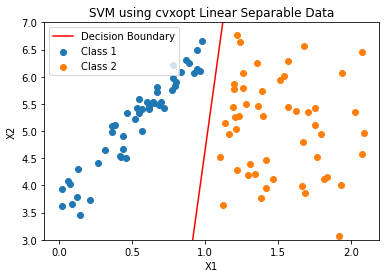

In [143]:
# scatter plot points
fig, ax = plt.subplots() 
ax.scatter(x_1,y_1, label='Class 1') 
ax.scatter(x_2,y_2, label='Class 2') 

# plot the Decision Boundary
beta_1, beta_2 = SVM_Hard_Margin.w
beta_0 = SVM_Hard_Margin.b[0]

# Calculate the intercept and gradient of the decision boundary.
c = -beta_0/beta_2
m = -beta_1/beta_2

xd = np.array([0, 2])
yd = m*xd + c
plt.plot(xd, yd, color='red', label='Decision Boundary')
ax.set_ylim(3,7)

ax.set_title('SVM using cvxopt Linear Separable Data')
ax.set_xlabel('X1') 
ax.set_ylabel('X2')
plt.legend()

* **Soft margin with non-Linear Separable Data**

In [144]:
class SupportVectorMachineSoftMargin:
    def __init__(self, tol=1e-4, gamma = 10):
        self.tol = tol
        self.gamma = gamma
        
    def fit(self, x, y):
        m = x.shape[0]
        X_dash = y * x
        H = np.dot(X_dash , X_dash.T)

        #Converting into cvxopt format
        P = cvxopt_matrix(H)
        q = cvxopt_matrix(-np.ones((m, 1)))
        G = cvxopt_matrix(np.vstack((np.eye(m)*-1,np.eye(m))))
        h = cvxopt_matrix(np.hstack((np.zeros(m), np.ones(m) * self.gamma)))
        A = cvxopt_matrix(y.reshape(1, -1))
        b = cvxopt_matrix(np.zeros(1))

        #Run solver
        sol = cvxopt_solvers.qp(P, q, G, h, A, b)
        alphas = np.array(sol['x'])

        self.w = np.dot((y*alphas).T,x).reshape(-1,1)
        S = (alphas > self.tol).flatten()
        self.b = y[S] - np.dot(x[S], self.w)

        return self

    def predict(self, x):
        y_pred = np.dot(x, self.w) + self.b[0]
        y_pred[y_pred >= 0] = 1 
        y_pred[y_pred < 0] = -1
        return y_pred

In [145]:
# Model initialization
SVM_Soft_Margin = SupportVectorMachineSoftMargin()
# Fit the data(train the model)
SVM_Soft_Margin.fit(x_train_soft,y_train_soft)
y_pred_soft = SVM_Soft_Margin.predict(x_test_soft)
test_accuracy = 1 - np.sum(np.abs((y_pred_soft - y_test_soft)/2)) / y_test_soft.shape[0]
print('Accuracy Score for Linear Kernel is', test_accuracy)
print('w = ',SVM_Soft_Margin.w)
print('b = ',SVM_Soft_Margin.b[0])

     pcost       dcost       gap    pres   dres
 0:  3.0403e+01 -5.0478e+03  1e+04  7e-01  2e-13
 1:  1.5674e+02 -1.1261e+03  1e+03  4e-15  1e-13
 2: -1.6657e+01 -1.9903e+02  2e+02  2e-16  7e-14
 3: -4.6008e+01 -1.4033e+02  9e+01  9e-16  1e-13
 4: -6.0683e+01 -1.0515e+02  4e+01  9e-16  8e-14
 5: -6.9499e+01 -9.3215e+01  2e+01  1e-14  1e-13
 6: -7.6212e+01 -8.2181e+01  6e+00  1e-14  1e-13
 7: -7.8174e+01 -7.9516e+01  1e+00  2e-15  1e-13
 8: -7.8727e+01 -7.8772e+01  4e-02  4e-15  2e-13
 9: -7.8749e+01 -7.8750e+01  4e-04  2e-16  1e-13
10: -7.8749e+01 -7.8749e+01  4e-06  2e-15  1e-13
Optimal solution found.
Accuracy Score for Linear Kernel is 0.92
w =  [[ 6.27221564]
 [-1.77775779]]
b =  [4.03928055]


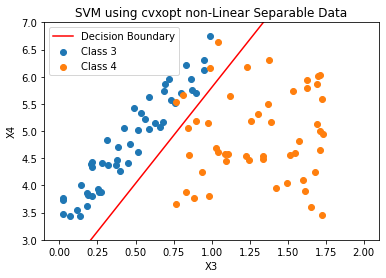

In [146]:
# scatter plot points
fig, ax = plt.subplots() 
ax.scatter(x_3,y_3, label='Class 3') 
ax.scatter(x_4,y_4, label='Class 4') 

# plot the Decision Boundary
beta_1, beta_2 = SVM_Soft_Margin.w
beta_0 = SVM_Soft_Margin.b[0]

# Calculate the intercept and gradient of the decision boundary.
c = -beta_0/beta_2
m = -beta_1/beta_2

xd = np.array([0, 2])
yd = m*xd + c
plt.plot(xd, yd, color='red', label='Decision Boundary')
ax.set_ylim(3,7)

ax.set_title('SVM using cvxopt non-Linear Separable Data')
ax.set_xlabel('X3') 
ax.set_ylabel('X4')
plt.legend()

### **Implementing Support Vector Machine from sklearn**

In [147]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [148]:
clf = SVC(C = 10, kernel = 'linear')
clf.fit(x_train_hard, y_train_hard.ravel()) 
y_pred_hard = clf.predict(x_test_hard)
print('Accuracy Score for Linear Kernel is', accuracy_score(y_test_hard, y_pred_hard))
print('w = ',clf.coef_)
print('b = ',clf.intercept_)

Accuracy Score for Linear Kernel is 1.0
w =  [[ 7.11154368 -0.5166845 ]]
b =  [-4.51812289]


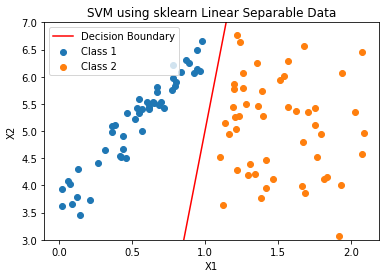

In [149]:
# scatter plot points
fig, ax = plt.subplots() 
ax.scatter(x_1,y_1, label='Class 1') 
ax.scatter(x_2,y_2, label='Class 2') 

# plot the Decision Boundary
beta_1, beta_2 = clf.coef_[0]
beta_0 = clf.intercept_

# Calculate the intercept and gradient of the decision boundary.
c = -beta_0/beta_2
m = -beta_1/beta_2

xd = np.array([0, 2])
yd = m*xd + c
plt.plot(xd, yd, color='red', label='Decision Boundary')
ax.set_ylim(3,7)

ax.set_title('SVM using sklearn Linear Separable Data')
ax.set_xlabel('X1') 
ax.set_ylabel('X2')
plt.legend()

In [150]:
clf = SVC(C = 10, kernel = 'linear')
clf.fit(x_train_soft, y_train_soft.ravel()) 
y_pred_soft = clf.predict(x_test_soft)
print('Accuracy Score for Linear Kernel is', accuracy_score(y_test_soft, y_pred_soft))
print('w = ',clf.coef_)
print('b = ',clf.intercept_)

Accuracy Score for Linear Kernel is 0.92
w =  [[ 6.27220957 -1.77777897]]
b =  [3.94786869]


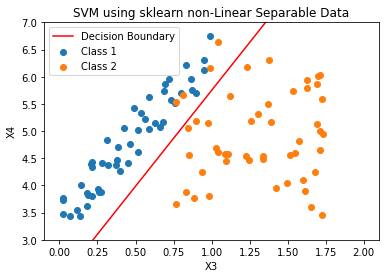

In [151]:
# scatter plot points
fig, ax = plt.subplots() 
ax.scatter(x_3,y_3, label='Class 1') 
ax.scatter(x_4,y_4, label='Class 2') 

# plot the Decision Boundary
beta_1, beta_2 = clf.coef_[0]
beta_0 = clf.intercept_

# Calculate the intercept and gradient of the decision boundary.
c = -beta_0/beta_2
m = -beta_1/beta_2

xd = np.array([0, 2])
yd = m*xd + c
plt.plot(xd, yd, color='red', label='Decision Boundary')
ax.set_ylim(3,7)

ax.set_title('SVM using sklearn non-Linear Separable Data')
ax.set_xlabel('X3') 
ax.set_ylabel('X4')
plt.legend()

In [152]:
%%shell
jupyter nbconvert --to html ML_Algorithms_Support_Vector_Machine.ipynb

[NbConvertApp] Converting notebook ML_Algorithms_Support_Vector_Machine.ipynb to html
[NbConvertApp] Writing 461906 bytes to ML_Algorithms_Support_Vector_Machine.html
